In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/before_down_BTC1.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [4]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,BTC,down,2017-09-14 15:00:00,CryptoHourly,0,0,NaN,"@#1, Bitcoin with unit price of $3,531.31, mar..."
1,BTC,down,2017-09-14 15:00:00,howmanybigmacs,0,0,NaN,You can buy 892 Big Macs with 1 Bitcoin
2,BTC,down,2017-09-14 15:00:01,CryptoHourly,0,0,NaN,"@#3, Bitcoin Cash with unit price of $427.41, ..."
3,BTC,down,2017-09-14 15:00:02,efp47932,0,0,NaN,Bitcoin Exchanges Cover Shorts! (Bix Weir) htt...
4,BTC,down,2017-09-14 15:00:02,bitcoinrate247,0,0,NaN,"Average Bitcoin market price is: USD 3,570.57,..."
...,...,...,...,...,...,...,...,...
13657,BTC,down,2017-09-14 20:59:52,CashEpico2,1,1,#crypto #ethereum #altcoins #bitcoin #bitcoin ...,"http://AltcoinExchange.com! BUILT BY TRADERS, ..."
13658,BTC,down,2017-09-14 20:59:54,ESPACIOBITVE,0,0,NaN,¿Qué está sucediendo con el Bitcoin? https://e...
13659,BTC,down,2017-09-14 20:59:54,prosperclub,0,0,NaN,"""Bitcoin is a monopoly run by a protocol, not ..."
13660,BTC,down,2017-09-14 20:59:56,AdamTheAlien,0,0,NaN,"I kinda agree, but I don't think bitcoin is an..."


In [7]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=str(x) ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [8]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [9]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [10]:
text['text']

0        [@, 1, ,, bitcoin, with, unit, price, of, $, 3...
1        [you, can, buy, 892, big, macs, with, 1, bitcoin]
2        [@, 3, ,, bitcoin, cash, with, unit, price, of...
3        [bitcoin, exchanges, cover, shorts, !, (, bix,...
4        [average, bitcoin, market, price, is, :, usd, ...
                               ...                        
13657    [!, built, by, traders, ,, for, traders, !, cr...
13658    [¿qué, está, sucediendo, con, el, bitcoin, ?, ...
13659    [``, bitcoin, is, a, monopoly, run, by, a, pro...
13660    [i, kinda, agree, ,, but, i, do, n't, think, b...
13661    [john, mcafee, challenges, jamie, dimon, on, b...
Name: text, Length: 13662, dtype: object

In [11]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [15]:
text['text']

0        [,, bitcoin, unit, price, $, ,, market, cap, $...
1                                [buy, big, macs, bitcoin]
2        [,, bitcoin, cash, unit, price, $, ,, market, ...
3        [bitcoin, exchanges, cover, shorts, !, (, bix,...
4        [average, bitcoin, market, price, :, usd, ,, eur]
                               ...                        
13657    [!, built, traders, ,, traders, !, crypto, eth...
13658    [¿qué, está, sucediendo, con, el, bitcoin, ?, ...
13659    [``, bitcoin, monopoly, run, protocol, ,, mana...
13660    [kinda, agree, ,, think, bitcoin, less, fraud,...
13661    [john, mcafee, challenges, jamie, dimon, bitco...
Name: text, Length: 13662, dtype: object

In [16]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [21]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [22]:
article_contents = tokenized_doc.values.tolist()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [24]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [25]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [26]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [27]:
word2id = defaultdict(lambda: 0)

In [28]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [29]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [30]:
len(tf_idf_result)

13935

In [31]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

13935


In [32]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [33]:
sentences = article_contents

In [34]:
from gensim.models import Word2Vec

In [35]:
model = Word2Vec(sentences, min_count=1)

In [36]:
len(model.wv.vocab)

13935

In [37]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [38]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [39]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [40]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [41]:
temp_cluster_result['cluster'] = assigned_clusters

In [42]:
temp_cluster_result['raw_data'] = X.tolist()

In [43]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [44]:
from sklearn.metrics import pairwise_distances

In [45]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [46]:
len(cosine_centroid_list)

13935

In [47]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [48]:
sum(temp_distance[3])

2841.6289701641113

In [49]:
import scipy.spatial.distance as dist

In [50]:
dist.cosine(X[0],cosine_centroid_list[0])

0.024649885558055473

In [51]:
dist.euclidean(X[0],cosine_centroid_list[0])

6.098945521277201

In [52]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [53]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [54]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
0,"[0.04088602587580681, -0.39859744906425476, -1...",bitcoin,0,"[-0.0069215964, -0.016021417, -0.1662883, 0.01...",0.024650,0.955124,0.069526,NaN
41,"[0.006260411813855171, -0.046668101102113724, ...",china,0,"[-0.0069215964, -0.016021417, -0.1662883, 0.01...",0.009120,0.116834,0.892285,NaN
5,"[-0.34937551617622375, -0.11657671630382538, -...",exchange,0,"[-0.0069215964, -0.016021417, -0.1662883, 0.01...",0.010226,0.115482,0.894744,NaN
55,"[-0.21088792383670807, 0.15858344733715057, -2...",trade,0,"[-0.0069215964, -0.016021417, -0.1662883, 0.01...",0.023390,0.089738,0.933652,NaN
138,"[-0.2648807466030121, -0.26497533917427063, -2...",news,0,"[-0.0069215964, -0.016021417, -0.1662883, 0.01...",0.031108,0.059037,0.972071,NaN
38,"[-0.11310484260320663, -0.5106769800186157, -1...",cryptocurrency,0,"[-0.0069215964, -0.016021417, -0.1662883, 0.01...",0.037885,0.051995,0.985890,NaN
332,"[-0.6689205169677734, -0.2727276682853699, -3....",chinese,0,"[-0.0069215964, -0.016021417, -0.1662883, 0.01...",0.033449,0.043658,0.989791,NaN
35,"[-0.4091740846633911, -0.31578072905540466, -2...",crash,0,"[-0.0069215964, -0.016021417, -0.1662883, 0.01...",0.021765,0.027603,0.994162,NaN
210,"[-0.09526852518320084, 0.022820528596639633, -...",btcc,0,"[-0.0069215964, -0.016021417, -0.1662883, 0.01...",0.013554,0.015548,0.998006,NaN
221,"[-0.20267347991466522, -0.006524843629449606, ...",september,0,"[-0.0069215964, -0.016021417, -0.1662883, 0.01...",0.011810,0.012844,0.998966,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
12,"[-0.16283740103244781, -0.5326452851295471, -1...",blockchain,1,"[0.00041480374, -0.03341786, -0.06337227, 0.03...",0.013811,0.049517,0.964295,NaN
119,"[0.07368437200784683, -0.6914433836936951, -0....",crypto,1,"[0.00041480374, -0.03341786, -0.06337227, 0.03...",0.036882,0.054925,0.981957,NaN
289,"[0.09596168249845505, -0.4650284945964813, -0....",time,1,"[0.00041480374, -0.03341786, -0.06337227, 0.03...",0.004969,0.017632,0.987336,NaN
372,"[0.002335976343601942, -0.5588791966438293, -0...",coin,1,"[0.00041480374, -0.03341786, -0.06337227, 0.03...",0.003058,0.011548,0.991510,NaN
184,"[0.017628366127610207, -0.6238617897033691, -0...",mine,1,"[0.00041480374, -0.03341786, -0.06337227, 0.03...",0.008930,0.016506,0.992424,NaN
193,"[-0.01860188879072666, -0.41202548146247864, -...",people,1,"[0.00041480374, -0.03341786, -0.06337227, 0.03...",0.001208,0.007492,0.993716,NaN
545,"[-0.002958650002256036, -0.38997921347618103, ...",post,1,"[0.00041480374, -0.03341786, -0.06337227, 0.03...",0.001698,0.007830,0.993868,NaN
315,"[0.022349879145622253, -0.4748799800872803, -0...",think,1,"[0.00041480374, -0.03341786, -0.06337227, 0.03...",0.004646,0.010309,0.994337,NaN
704,"[-0.10198380798101425, -0.43195849657058716, -...",look,1,"[0.00041480374, -0.03341786, -0.06337227, 0.03...",0.005088,0.009971,0.995117,NaN
1131,"[0.0053014433942735195, -0.4244592487812042, -...",live,1,"[0.00041480374, -0.03341786, -0.06337227, 0.03...",0.001130,0.005859,0.995271,NaN


In [56]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
250,"[0.053458113223314285, -0.6249791979789734, -0...",money,2,"[7.4057e-05, -0.031405084, -0.04355368, 0.0340...",0.006852,0.017069,0.989783,NaN
249,"[0.04840061441063881, -0.5794629454612732, -0....",make,2,"[7.4057e-05, -0.031405084, -0.04355368, 0.0340...",0.003368,0.010253,0.993115,NaN
523,"[-0.018918054178357124, -0.46534597873687744, ...",fund,2,"[7.4057e-05, -0.031405084, -0.04355368, 0.0340...",0.001940,0.007380,0.994561,NaN
709,"[-0.0031421745661646128, -0.4856761395931244, ...",investment,2,"[7.4057e-05, -0.031405084, -0.04355368, 0.0340...",0.002854,0.007323,0.995531,NaN
476,"[-0.01821267232298851, -0.7030552625656128, -1...",para,2,"[7.4057e-05, -0.031405084, -0.04355368, 0.0340...",0.003497,0.007943,0.995554,NaN
1487,"[0.007390483282506466, -0.39034730195999146, -...",talk,2,"[7.4057e-05, -0.031405084, -0.04355368, 0.0340...",0.001639,0.004507,0.997133,NaN
100,"[0.00014921576075721532, -0.4534898102283478, ...",dólares,2,"[7.4057e-05, -0.031405084, -0.04355368, 0.0340...",0.001099,0.003887,0.997212,NaN
2789,"[-0.0036485379096120596, -0.21639572083950043,...",link,2,"[7.4057e-05, -0.031405084, -0.04355368, 0.0340...",0.001180,0.003943,0.997237,NaN
320,"[0.0027907725889235735, -0.31992125511169434, ...",work,2,"[7.4057e-05, -0.031405084, -0.04355368, 0.0340...",0.001166,0.003831,0.997335,NaN
1213,"[-0.0038623851723968983, -0.4995845556259155, ...",como,2,"[7.4057e-05, -0.031405084, -0.04355368, 0.0340...",0.002051,0.004676,0.997375,NaN


In [57]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 논쟁

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
673,"[0.030317429453134537, -0.23697608709335327, -...",claim,3,"[0.0032299657, -0.044012077, -0.024667798, 0.0...",0.008724,0.002310,1.006414,NaN
1059,"[0.05125221982598305, -0.5916560292243958, -0....",comment,3,"[0.0032299657, -0.044012077, -0.024667798, 0.0...",0.014851,0.007098,1.007753,NaN
845,"[0.022376153618097305, -0.7423242926597595, -0...",join,3,"[0.0032299657, -0.044012077, -0.024667798, 0.0...",0.017793,0.007718,1.010076,NaN
4771,"[0.00044352130498737097, -0.030180765315890312...",utile,3,"[0.0032299657, -0.044012077, -0.024667798, 0.0...",0.011553,0.000225,1.011328,NaN
2110,"[-0.014468341134488583, -0.301800012588501, -0...",stfu,3,"[0.0032299657, -0.044012077, -0.024667798, 0.0...",0.016385,0.003155,1.013230,NaN
1519,"[0.09489324688911438, -0.5495972037315369, -0....",faucet,3,"[0.0032299657, -0.044012077, -0.024667798, 0.0...",0.018607,0.005295,1.013311,NaN
6681,"[-0.002846936695277691, -0.044991496950387955,...",wreck,3,"[0.0032299657, -0.044012077, -0.024667798, 0.0...",0.014227,0.000338,1.013889,NaN
1266,"[-0.0256122387945652, -0.41231104731559753, -0...",tell,3,"[0.0032299657, -0.044012077, -0.024667798, 0.0...",0.020247,0.006197,1.014050,NaN
7305,"[-0.0015499098226428032, -0.03966765105724335,...",reinforce,3,"[0.0032299657, -0.044012077, -0.024667798, 0.0...",0.016604,0.000169,1.016435,NaN
2377,"[0.0023336808662861586, -0.02043987065553665, ...",laugh,3,"[0.0032299657, -0.044012077, -0.024667798, 0.0...",0.017337,0.000225,1.017112,NaN


In [58]:
y_km = temp_cluster_result['cluster'].values

In [59]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

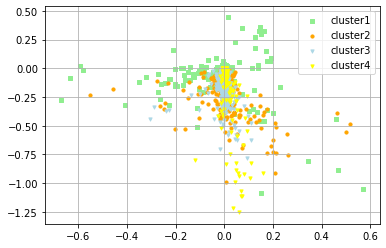

In [60]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 비즈

768

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 거래

3615

In [63]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 투자

8703

In [65]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 인플

849

In [66]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [67]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 7 # 비즈

In [68]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 12 # 거래소

In [69]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label']  = 11 # 투자

In [70]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 6 # 토론,논쟁

In [71]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [72]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [73]:
kmeans.inertia_

2360.9501953125

In [74]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[3 0 3 ... 0 0 0]


In [75]:
cluster_values= list(model.wv.vocab)

In [76]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-2360.949951171875


In [77]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [78]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.80677867


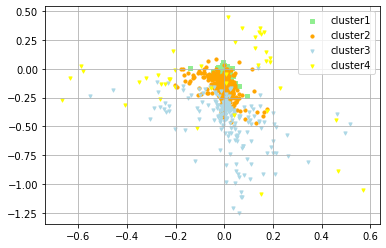

In [79]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [80]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [81]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [82]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [83]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [84]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [85]:
import scipy.spatial.distance as dist

In [86]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [87]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [88]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
8791,"[0.001442354405298829, -0.0225942712277174, -0...",uconn,0,"[6.635289e-05, -0.01812977, -0.027666477, 0.01...",0.026433,0.000056,1.026377,NaN
12001,"[0.001129913842305541, -0.014143260195851326, ...",güzelleşecek,0,"[6.635289e-05, -0.01812977, -0.027666477, 0.01...",0.027250,0.000056,1.027194,NaN
11038,"[-0.001085487543605268, -0.021998004987835884,...",mitape,0,"[6.635289e-05, -0.01812977, -0.027666477, 0.01...",0.027384,0.000056,1.027327,NaN
11565,"[-0.0047485739924013615, -0.01923951879143715,...",shapeshift,0,"[6.635289e-05, -0.01812977, -0.027666477, 0.01...",0.027859,0.000113,1.027746,NaN
13762,"[-0.0030426429584622383, -0.017090843990445137...",bancário,0,"[6.635289e-05, -0.01812977, -0.027666477, 0.01...",0.027909,0.000056,1.027853,NaN
12609,"[-0.002802198985591531, -0.013657179661095142,...",catatumbo,0,"[6.635289e-05, -0.01812977, -0.027666477, 0.01...",0.027911,0.000056,1.027855,NaN
1323,"[0.004927676636725664, -0.017551904544234276, ...",garantie,0,"[6.635289e-05, -0.01812977, -0.027666477, 0.01...",0.028123,0.000056,1.028067,NaN
235,"[-0.00043228548020124435, -0.01681696064770221...",ഡിജിറ്റൽ,0,"[6.635289e-05, -0.01812977, -0.027666477, 0.01...",0.028320,0.000225,1.028094,NaN
9915,"[0.004542266950011253, -0.01358208991587162, -...",pentru,0,"[6.635289e-05, -0.01812977, -0.027666477, 0.01...",0.028255,0.000056,1.028198,NaN
8358,"[0.0019155051559209824, -0.015352220274508, -0...",بالصين,0,"[6.635289e-05, -0.01812977, -0.027666477, 0.01...",0.028466,0.000056,1.028409,NaN


In [89]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
340,"[0.0034582321532070637, -0.13729779422283173, ...",strong,1,"[-0.0021384503, -0.13548522, -0.2307853, 0.136...",0.075775,0.001408,1.074367,NaN
1934,"[-0.0015050377696752548, -0.14752009510993958,...",care,1,"[-0.0021384503, -0.13548522, -0.2307853, 0.136...",0.078114,0.001521,1.076593,NaN
616,"[-0.002266589319333434, -0.13579188287258148, ...",answer,1,"[-0.0021384503, -0.13548522, -0.2307853, 0.136...",0.077761,0.000958,1.076804,NaN
1790,"[0.00657310988754034, -0.13819339871406555, -0...",ponzi,1,"[-0.0021384503, -0.13548522, -0.2307853, 0.136...",0.079547,0.000845,1.078702,NaN
387,"[-0.012264393270015717, -0.1372665911912918, -...",innovation,1,"[-0.0021384503, -0.13548522, -0.2307853, 0.136...",0.085656,0.000845,1.084811,NaN
7576,"[-0.010538510978221893, -0.13590002059936523, ...",hakkında,1,"[-0.0021384503, -0.13548522, -0.2307853, 0.136...",0.088506,0.000958,1.087548,NaN
3365,"[0.0062912143766880035, -0.13778702914714813, ...",test,1,"[-0.0021384503, -0.13548522, -0.2307853, 0.136...",0.094935,0.001070,1.093865,NaN
8915,"[0.004168931860476732, -0.1332635134458542, -0...",appeal,1,"[-0.0021384503, -0.13548522, -0.2307853, 0.136...",0.094679,0.000789,1.093891,NaN
802,"[0.0015070816734805703, -0.12992148101329803, ...",jetzt,1,"[-0.0021384503, -0.13548522, -0.2307853, 0.136...",0.098058,0.000901,1.097157,NaN
1042,"[-0.0015980274183675647, -0.12622536718845367,...",moneta,1,"[-0.0021384503, -0.13548522, -0.2307853, 0.136...",0.100455,0.000507,1.099948,NaN


In [90]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2898,"[0.013326328247785568, -0.4269060492515564, -0...",lose,2,"[0.0146726705, -0.45301276, -0.66620684, 0.362...",0.301614,0.006197,1.295417,NaN
613,"[0.0396297350525856, -0.497550368309021, -0.57...",invest,2,"[0.0146726705, -0.45301276, -0.66620684, 0.362...",0.327296,0.009408,1.317888,NaN
1054,"[0.044269364327192307, -0.46757668256759644, -...",sell,2,"[0.0146726705, -0.45301276, -0.66620684, 0.362...",0.402952,0.008394,1.394558,NaN
708,"[0.025919174775481224, -0.4138811528682709, -0...",best,2,"[0.0146726705, -0.45301276, -0.66620684, 0.362...",0.434185,0.007267,1.426918,NaN
555,"[0.03171642869710922, -0.402446985244751, -0.6...",week,2,"[0.0146726705, -0.45301276, -0.66620684, 0.362...",0.438737,0.006985,1.431751,NaN
193,"[-0.01860188879072666, -0.41202548146247864, -...",people,2,"[0.0146726705, -0.45301276, -0.66620684, 0.362...",0.440381,0.007492,1.432889,NaN
301,"[0.007861649617552757, -0.4392186999320984, -0...",hodl,2,"[0.0146726705, -0.45301276, -0.66620684, 0.362...",0.442266,0.007267,1.434999,NaN
228,"[0.06193485110998154, -0.410405695438385, -0.5...",dollar,2,"[0.0146726705, -0.45301276, -0.66620684, 0.362...",0.447104,0.005577,1.441527,NaN
545,"[-0.002958650002256036, -0.38997921347618103, ...",post,2,"[0.0146726705, -0.45301276, -0.66620684, 0.362...",0.469170,0.007830,1.461339,NaN
1131,"[0.0053014433942735195, -0.4244592487812042, -...",live,2,"[0.0146726705, -0.45301276, -0.66620684, 0.362...",0.498307,0.005859,1.492449,NaN


In [91]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 부정적

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
0,"[0.04088602587580681, -0.39859744906425476, -1...",bitcoin,3,"[-0.046772506, -0.08667803, -1.6239761, 0.1182...",1.787710,0.955124,1.832586,NaN
221,"[-0.20267347991466522, -0.006524843629449606, ...",september,3,"[-0.046772506, -0.08667803, -1.6239761, 0.1182...",1.107076,0.012844,2.094232,NaN
40,"[-0.05332421511411667, -0.16504338383674622, -...",business,3,"[-0.046772506, -0.08667803, -1.6239761, 0.1182...",1.306874,0.012957,2.293918,NaN
211,"[0.009345676749944687, -0.12083212286233902, -...",announce,3,"[-0.046772506, -0.08667803, -1.6239761, 0.1182...",1.506958,0.009408,2.497550,NaN
219,"[-0.22509293258190155, -0.09029462188482285, -...",shut,3,"[-0.046772506, -0.08667803, -1.6239761, 0.1182...",1.572345,0.014647,2.557699,NaN
35,"[-0.4091740846633911, -0.31578072905540466, -2...",crash,3,"[-0.046772506, -0.08667803, -1.6239761, 0.1182...",1.630961,0.027603,2.603358,NaN
313,"[-0.27144762873649597, -0.052984803915023804, ...",close,3,"[-0.046772506, -0.08667803, -1.6239761, 0.1182...",1.894438,0.014872,2.879566,NaN
210,"[-0.09526852518320084, 0.022820528596639633, -...",btcc,3,"[-0.046772506, -0.08667803, -1.6239761, 0.1182...",2.012874,0.015548,2.997326,NaN
565,"[-0.5815736651420593, -0.016442811116576195, -...",tumble,3,"[-0.046772506, -0.08667803, -1.6239761, 0.1182...",2.018569,0.011154,3.007415,NaN
38,"[-0.11310484260320663, -0.5106769800186157, -1...",cryptocurrency,3,"[-0.046772506, -0.08667803, -1.6239761, 0.1182...",2.067923,0.051995,3.015928,NaN


In [92]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #이슈

12783

In [93]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #이슈

927

In [94]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #기타

183

In [95]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #부정적

42

In [96]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [97]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 5 # 이슈

In [98]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 5 # 이슈

In [99]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 13 # 기타

In [100]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 2 # 부정적

In [101]:
temp_cluster_result1['Silhouette'] = 0.80677867
temp_cluster_result['Silhouette'] = 0.80677867
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [102]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/before_down_BTC1_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/before_down_BTC1_cosine")